# MODELING

## In this section we are going to try couple of modeles to predict the electricity tendecy in the future

In [451]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? allows use of basic linear regressio models.
from statsmodels.graphics.api import abline_plot # What does this do? plot for use with a linear regression line.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Metrics for evaluating a model's accuracy.
from sklearn.model_selection import train_test_split #  What does this do? Enables splitting data into train/test sets.
from sklearn import linear_model, preprocessing # What does this do? packages for linear regression and scaling data sets.
import warnings # For handling error messages.
from matplotlib.pyplot import figure

In [452]:
df = pd.read_csv('/Users/markoglodovic/Downloads/electricity_clean.csv')

In [453]:
df = df[['Period', 'Activity', 'Source', 'Destination', 'Energy', 'Total_Value', 'Price']]

In [454]:
df['Period']=pd.to_datetime(df['Period'])

In [455]:
cs = ['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario', 'Québec','Saskatchewan','Alberta','Nova Scotia','Newfoundland and Labrador']
cd = ['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario', 'Québec','Saskatchewan','Alberta','Nova Scotia','Newfoundland and Labrador']
canada_s = df[df['Source'].isin(cs)]
canada_d = df[df['Destination'].isin(cd)]

In [456]:
canada_s1 = canada_s[canada_s['Period'] > '1997-01-01']
canada_d1 = canada_d[canada_d['Period'] > '1997-01-01']

In [457]:
canada_d1 =  canada_d1.set_index('Period')
canada_s1 =  canada_s1.set_index('Period')

In [458]:
canada_d1 = canada_d1.resample('M').sum()
canada_d1 = canada_d1.rename(columns = {'Energy':'EnergyD','Total_Value':'Total_ValueD','Price':'PriceD'})

In [459]:
canada_s1 = canada_s1.resample('M').sum()
canada_s1 = canada_s1.rename(columns={'Energy':'EnergyS','Total_Value':'Total_ValueS','Price':'PriceS'})

In [460]:
canada_net = pd.concat([canada_s1,canada_d1], axis =1)
canada_net['Net'] = canada_s1 ['EnergyS'] - canada_d1['EnergyD']

In [461]:
canada_net.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Freq: M
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EnergyS       290 non-null    float64
 1   Total_ValueS  290 non-null    float64
 2   PriceS        290 non-null    float64
 3   EnergyD       290 non-null    float64
 4   Total_ValueD  290 non-null    float64
 5   PriceD        290 non-null    float64
 6   Net           290 non-null    float64
dtypes: float64(7)
memory usage: 28.1 KB


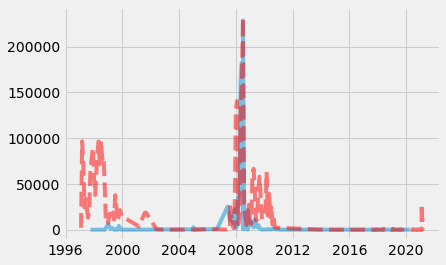

In [462]:
ss = ['Texas','West Virginia','Oklahoma','Kentucky']
sd = ['Texas','West Virginia','Oklahoma','Kentucky','Maryland','Virginia','Tennessee','Florida']
south_s = df[df['Source'].isin(ss)]
south_d = df[df['Destination'].isin(sd)]
plt.plot('Period', 'Energy', data = south_s, alpha=0.5)
plt.plot('Period', 'Energy', data = south_d, color='red', linestyle = 'dashed',alpha=0.5)
plt.show()

In [463]:
south_s1 = south_s[south_s['Period'] > '1997-01-01']
south_d1 = south_d[south_d['Period'] > '1997-01-01']
south_d1 =  south_d1.set_index('Period')
south_s1 =  south_s1.set_index('Period')
south_d1 = south_d1.resample('M').sum()
south_d1 = south_d1.rename(columns = {'Energy':'EnergyD','Total_Value':'Total_ValueD','Price':'PriceD'})
south_s1 = south_s1.resample('M').sum()
south_s1 = south_s1.rename(columns={'Energy':'EnergyS','Total_Value':'Total_ValueS','Price':'PriceS'})
south_net = pd.concat([south_s1,south_d1], axis =1)
south_net['Net_S'] =south_s1 ['EnergyS'] - south_d1['EnergyD']

In [464]:
south_net.fillna(0, inplace=True)

In [465]:
south_net.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Freq: M
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EnergyS       290 non-null    float64
 1   Total_ValueS  290 non-null    float64
 2   PriceS        290 non-null    float64
 3   EnergyD       290 non-null    float64
 4   Total_ValueD  290 non-null    float64
 5   PriceD        290 non-null    float64
 6   Net_S         290 non-null    float64
dtypes: float64(7)
memory usage: 28.1 KB


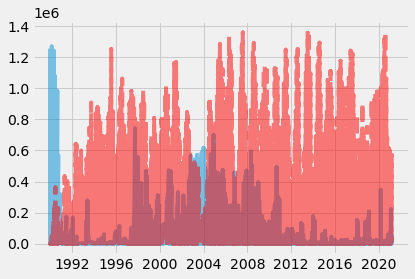

In [466]:
ms= ['Michigan', 'Minnesota','North Dakota','Nebraska', 'South Dakota','Wisconsin', 'Iowa','Missouri','Kansas','Minn / N. Dakota','Illinois', 'Ohio', 'Indiana']
md = ['Michigan', 'Minnesota','North Dakota','Nebraska', 'South Dakota','Wisconsin', 'Iowa','Missouri','Kansas','Minn / N. Dakota','Illinois', 'Ohio', 'Indiana']
middle_s = df[df['Source'].isin(ms)]
middle_d = df[df['Destination'].isin(md)]
plt.plot('Period', 'Energy', data = middle_s ,alpha=0.5)
plt.plot('Period', 'Energy', data = middle_d, color='red', linestyle = 'dashed',alpha=0.5)
plt.show()

In [467]:
middle_d = middle_d[middle_d['Period'] > '1997-01-01']
middle_s = middle_s[middle_s['Period'] > '1997-01-01']
middle_d =  middle_d.set_index('Period')
middle_s=  middle_s.set_index('Period')
middle_d = middle_d.rename(columns = {'Energy':'EnergyD','Total_Value':'Total_ValueD','Price':'PriceD'})
middle_s= middle_s.rename(columns = {'Energy':'EnergyS','Total_Value':'Total_ValueS','Price':'PriceS'})
middle_s = middle_s.resample('M').sum()
middle_d = middle_d.resample('M').sum()
middle_net = pd.concat([middle_s,middle_d], axis =1)
middle_net['Net_M'] = middle_s ['EnergyS'] - middle_d['EnergyD']



In [468]:
middle_net.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Freq: M
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EnergyS       290 non-null    float64
 1   Total_ValueS  290 non-null    float64
 2   PriceS        290 non-null    float64
 3   EnergyD       290 non-null    float64
 4   Total_ValueD  290 non-null    float64
 5   PriceD        290 non-null    float64
 6   Net_M         290 non-null    float64
dtypes: float64(7)
memory usage: 28.1 KB


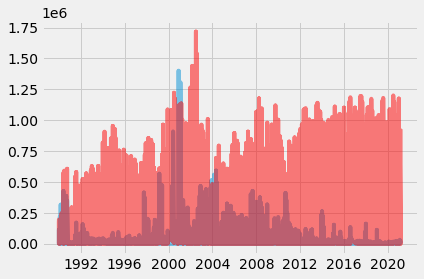

In [469]:
nes = ['Maine','New England-ISO','New York','Vermont','Pennsylvania','Massachusetts','New Jersey','Connecticut']
ned = ['Maine','New England-ISO','New York','Vermont','Pennsylvania','Massachusetts','New Jersey','Connecticut']
east_s= df[df['Source'].isin(nes)]
east_d= df[df['Destination'].isin(ned)]
plt.plot('Period', 'Energy', data = east_s,alpha=0.5)
plt.plot('Period', 'Energy', data = east_d, color='red',  alpha=0.5)
plt.show()

In [470]:
east_d = east_d[east_d['Period'] > '1997-01-01']
east_s = east_s[east_s['Period'] > '1997-01-01']
east_d =  east_d.set_index('Period')
east_s=  east_s.set_index('Period')
east_d = east_d.rename(columns = {'Energy':'EnergyD','Total_Value':'Total_ValueD','Price':'PriceD'})
east_s= east_s.rename(columns = {'Energy':'EnergyS','Total_Value':'Total_ValueS','Price':'PriceS'})
east_s = east_s.resample('M').sum()
east_d = east_d.resample('M').sum()
east_net = pd.concat([east_s,east_d], axis =1)
east_net['Net_E'] = east_s ['EnergyS'] - east_d['EnergyD']

In [471]:
east_net.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Freq: M
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EnergyS       290 non-null    float64
 1   Total_ValueS  290 non-null    float64
 2   PriceS        290 non-null    float64
 3   EnergyD       290 non-null    float64
 4   Total_ValueD  290 non-null    float64
 5   PriceD        290 non-null    float64
 6   Net_E         290 non-null    float64
dtypes: float64(7)
memory usage: 28.1 KB


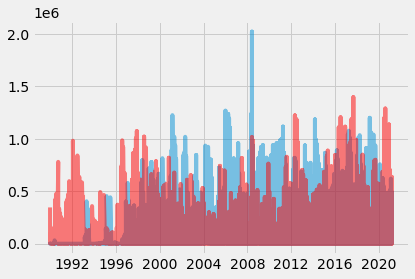

In [472]:
ws = ['Montana','Washington','Idaho','Oregon','California','Arizona','Nevada', 'New Mexico','Colorado', 'Utah','Wyoming']
wd = ['Montana','Washington','Idaho','Oregon','California','Arizona','Nevada', 'New Mexico','Colorado', 'Utah','Wyoming']
west_s = df[df['Source'].isin(ws)]
west_d = df[df['Destination'].isin(wd)]
plt.plot('Period', 'Energy', data = west_s,alpha=0.5)
plt.plot('Period', 'Energy', data = west_d, color='red', alpha = 0.5)
plt.show()

In [473]:
west_d = west_d[west_d['Period'] > '1997-01-01']
west_s = west_s[west_s['Period'] > '1997-01-01']
west_d = west_d.set_index('Period')
west_s=  west_s.set_index('Period')
west_d = west_d.rename(columns = {'Energy':'EnergyD','Total_Value':'Total_ValueD','Price':'PriceD'})
west_s= west_s.rename(columns = {'Energy':'EnergyS','Total_Value':'Total_ValueS','Price':'PriceS'})
west_s = west_s.resample('M').sum()
west_d = west_d.resample('M').sum()
west_net = pd.concat([west_s,west_d], axis =1)
west_net['Net_W'] = west_s ['EnergyS'] - west_d['EnergyD']

In [474]:
west_net.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Freq: M
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EnergyS       290 non-null    float64
 1   Total_ValueS  290 non-null    float64
 2   PriceS        290 non-null    float64
 3   EnergyD       290 non-null    float64
 4   Total_ValueD  290 non-null    float64
 5   PriceD        290 non-null    float64
 6   Net_W         290 non-null    float64
dtypes: float64(7)
memory usage: 28.1 KB


In [475]:
west_net.head()

,EnergyS,Total_ValueS,PriceS,EnergyD,Total_ValueD,PriceD,Net_W
Period,,,,,,,
1997-02-28,593556.00,7137483.86,151.509997,229924.000,2925862.21,73.389999,363632.000
1997-03-31,418397.60,4462763.82,143.849999,316778.000,4521645.14,89.099999,101619.600
1997-04-30,367519.84,3168961.27,86.130001,456505.000,7990062.53,97.750000,-88985.160
1997-05-31,334130.36,3194266.84,121.600004,421786.000,9727954.36,170.420000,-87655.640
1997-06-30,290022.00,2855691.03,135.020001,429733.169,8186166.34,140.500001,-139711.169


In [476]:
USAs = df[-df["Source"].isin(cs)]
USAd = df[-df["Destination"].isin(cs)]

In [477]:
USAd = USAd[USAd['Period'] > '1997-01-01']
USAs = USAs[USAs['Period'] > '1997-01-01']



USAd = USAd.rename(columns = {'Energy':'EnergyD'})
USAs= USAs.rename(columns = {'Energy':'EnergyS'})

USAs = USAs[['Period', 'Source', 'EnergyS']]
USAd = USAd[['Period', 'Destination', 'EnergyD']]

In [478]:
USAd =  USAd.set_index('Period')
USAs=  USAs.set_index('Period')

In [479]:
USAsG = USAs.groupby('Source').resample('M').sum()
USAdG = USAd.groupby('Destination').resample('M').sum()

In [480]:
USAsG = USAsG.reset_index()
USAdG = USAdG.reset_index()

In [481]:
USAsG = USAsG.pivot(index = 'Period', columns = 'Source', values = 'EnergyS')
USAdG = USAdG.pivot(index = 'Period', columns = 'Destination', values = 'EnergyD')

In [482]:
USAsG.fillna(0, inplace=True)
USAdG.fillna(0, inplace=True)

In [483]:
usa_net = USAsG - USAdG

In [484]:
usa_net.shape

(290, 43)

In [485]:
usa_net.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Alaska            0 non-null      float64
 1   Arizona           290 non-null    float64
 2   California        290 non-null    float64
 3   Colorado          290 non-null    float64
 4   Connecticut       290 non-null    float64
 5   Florida           0 non-null      float64
 6   Idaho             290 non-null    float64
 7   Illinois          290 non-null    float64
 8   Indiana           290 non-null    float64
 9   Iowa              290 non-null    float64
 10  Kansas            290 non-null    float64
 11  Kentucky          0 non-null      float64
 12  Maine             290 non-null    float64
 13  Maryland          0 non-null      float64
 14  Massachusetts     290 non-null    float64
 15  Michigan          290 non-null    float64
 16  Minn / N. Dakota  290 non

In [486]:
usa_net = usa_net.dropna(axis='columns')

In [487]:
usa_net.head()

,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Kansas,Maine,...,Oklahoma,Oregon,Pennsylvania,South Dakota,Texas,Utah,Vermont,Washington,Wisconsin,Wyoming
Period,,,,,,,,,,,,,,,,,,,,,
1997-02-28,0.0,0.0,0.0,0.0,-465.0,0.0,0.0,0.0,0.0,-217429.814,...,0.0,-3780.0,0.0,-2971.0,-2135.0,0.0,-191067.0,368088.000,-99014.0,0.0
1997-03-31,0.0,-25240.0,0.0,0.0,-2052.0,0.0,0.0,-1745.0,0.0,-233912.664,...,0.0,-4395.0,-2200.0,-9.0,-96570.0,0.0,-183487.0,133178.000,-101673.0,0.0
1997-04-30,0.0,-45755.0,0.0,0.0,-8622.0,0.0,0.0,-540.0,0.0,-363885.070,...,0.0,-39488.0,-73025.0,-28.0,-71735.0,0.0,-139597.0,5916.000,-55868.0,0.0
1997-05-31,0.0,-110046.0,-1700.0,0.0,-16736.0,0.0,0.0,-19507.0,0.0,-302524.600,...,0.0,-19540.0,-18822.0,-75079.0,-24328.0,0.0,-178042.0,62075.000,-70975.0,0.0
1997-06-30,-39950.0,-136529.0,-1600.0,0.0,-3641.0,0.0,0.0,-19414.0,0.0,-341242.021,...,0.0,-15363.0,-105.0,-32.0,-33847.0,0.0,-178226.0,58122.831,-66944.0,0.0


## Multiple linear regression

Coefficients:  [-1.00224546 -0.99948175 -1.18048939 -1.30166579 -0.99345562 -1.02668408
 -0.9987727  -0.98868045 -0.9869811  -1.00119632 -0.99592854 -0.99945627
 -1.00127517 -0.99962158 -0.99587719 -1.00072901 -1.00230098 -0.97833164
 -1.00014509 -0.9424998  -1.03644965 -0.99956542 -1.00474266 -0.99955702
 -0.99218333 -0.9967515  -1.00419195 -0.99721735 -0.99772025 -0.94819836
 -0.99987817 -1.00103573 -0.98847927 -1.06314508]
Variance score: 0.9999848020421445


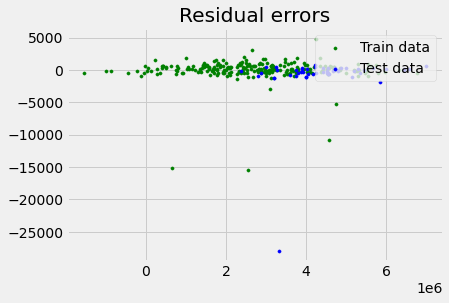

In [488]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
 
# defining feature matrix(X) and response vector(y)

usa_net_tr = usa_net['1997-02-28' : '2017-01-01']
X_train = usa_net_tr
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
usa_net_t = usa_net['2017-01-01' : '2021-03-31']
X_test = usa_net_t
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
 
# splitting X and y into training and testing sets

 
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

Coefficients:  [-1.09888497  0.        ]
Variance score: -2.362627687431419


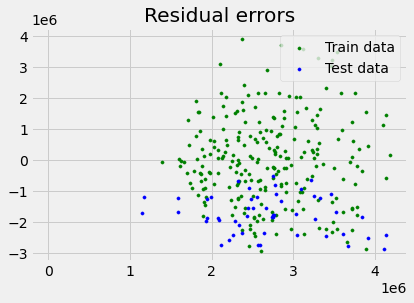

In [489]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
 
# defining feature matrix(X) and response vector(y)
west_net['constant'] = 1

west_net_tr = west_net['1997-02-28' : '2017-01-01']
X_train = west_net_tr[['Net_W', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
west_net_t = west_net['2017-01-01' : '2021-03-31']
X_test = west_net_t[['Net_W', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']


# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

Coefficients:  [-1.49876071  0.        ]
Variance score: 0.38608088206310265


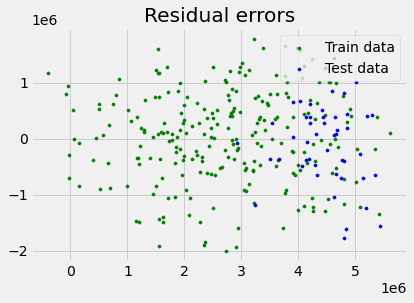

In [490]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
 
# defining feature matrix(X) and response vector(y)
east_net['constant'] = 1

east_net_tr = east_net['1997-02-28' : '2017-01-01']
X_train = east_net_tr[['Net_E', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
east_net_t = east_net['2017-01-01' : '2021-03-31']
X_test = east_net_t[['Net_E', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']


# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

Coefficients:  [-0.50351073  0.        ]
Variance score: -2.9290194149874624


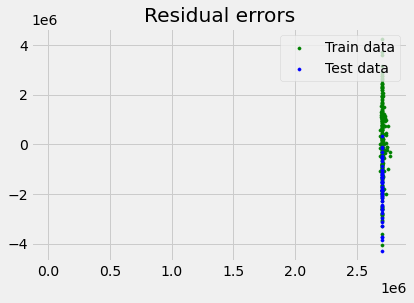

In [491]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
 
# defining feature matrix(X) and response vector(y)
south_net['constant'] = 1

south_net_tr = south_net['1997-02-28' : '2017-01-01']
X_train = south_net_tr[['Net_S', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
south_net_t = south_net['2017-01-01' : '2021-03-31']
X_test = south_net_t[['Net_S', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']


# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

Coefficients:  [-1.84754958  0.        ]
Variance score: 0.10719868110848374


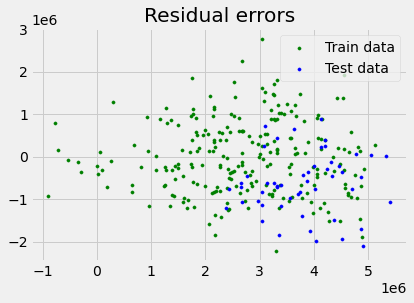

In [492]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
 
# defining feature matrix(X) and response vector(y)
middle_net['constant'] = 1

middle_net_tr = middle_net['1997-02-28' : '2017-01-01']
X_train = middle_net_tr[['Net_M', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
middle_net_t = middle_net['2017-01-01' : '2021-03-31']
X_test = middle_net_t[['Net_M', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']


# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

# OLS


In [493]:
usa_net['constant'] = 1
usa_net_tr = usa_net['1997-02-28' : '2017-01-01']
X_train = usa_net_tr
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
usa_net_t = usa_net['2017-01-01' : '2021-03-31']
X_test = usa_net_t
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
rModel = sm.OLS(y_train, X_train)
rModel = rModel.fit()
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.354e+06
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:07:41   Log-Likelihood:                -2127.4
No. Observations:                 239   AIC:                             4325.
Df Residuals:                     204   BIC:                             4447.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Arizona             -1.0022      0.010    -96.453      0.000      -1.023      -0.982
California          -0.9995      0.001  -1343.477      0.000      -1.001      -0.998
Colorado            -1.1805      0.060    -19.557      0.000      -1.300      -1.061
Connecticut         -1.3017      2.334     -0.558      0.578      -5.903       3.300
Idaho               -0.9935      0.021    -47.485      0.000      -1.035      -0.952
Illinois            -1.0267      0.020    -51.938      0.000      -1.066      -0.988
Indiana             -0.9988      0.025    -40.482      0.000      -1.047      -0.950
Iowa                -0.9887      0.033    -29.984      0.000      -1.054      -0.924
Kansas              -0.9870      0.262     -3.763      0.000      -1.504      -0.470
Maine               -1.0012      0.001   -879.839      0.000      -1.003      -0.999
Massachusetts       -0.9959      0.008   -129.281      0.000      -1.011      -0.981
Michigan            -0.9995      0.001  -1617.572      0.000      -1.001      -0.998
Minn / N. Dakota    -1.0013      0.000  -2347.962      0.000      -1.002      -1.000
Minnesota           -0.9996      0.001   -698.655      0.000      -1.002      -0.997
Missouri            -0.9959      0.012    -84.800      0.000      -1.019      -0.973
Montana             -1.0007      0.007   -143.674      0.000      -1.014      -0.987
Nebraska            -1.0023      0.003   -287.114      0.000      -1.009      -0.995
Nevada              -0.9783      0.011    -91.779      0.000      -0.999      -0.957
New England-ISO     -1.0001      0.001  -1798.468      0.000      -1.001      -0.999
New Jersey          -0.9425      0.118     -7.978      0.000      -1.175      -0.710
New Mexico          -1.0364      0.042    -24.439      0.000      -1.120      -0.953
New York            -0.9996      0.000  -2592.935      0.000      -1.000      -0.999
North Dakota        -1.0047      0.004   -245.684      0.000      -1.013      -0.997
Ohio                -0.9996      0.006   -180.408      0.000      -1.010      -0.989
Oklahoma            -0.9922      4.163     -0.238      0.812      -9.201       7.217
Oregon              -0.9968      0.003   -355.625      0.000      -1.002      -0.991
Pennsylvania        -1.0042      0.006   -161.346      0.000      -1.016      -0.992
South Dakota        -0.9972      0.021    -47.832      0.000      -1.038      -0.956
Texas               -0.9977      0.008   -127.748      0.000      -1.013      -0.982
Utah                -0.9482      0.036    -26.205      0.000      -1.020      -0.877
Vermont             -0.9999      0.001  -1343.026      0.000      -1.001      -0.998
Washington          -1.0010      0.000  -2239.853      0.000      -1.002      -1.000
Wisconsin           -0.9885      0.015    -67.000      0.000      -1.018      -0.959
Wyoming             -1.

In [494]:
y_predict = rModel.predict(X_test)

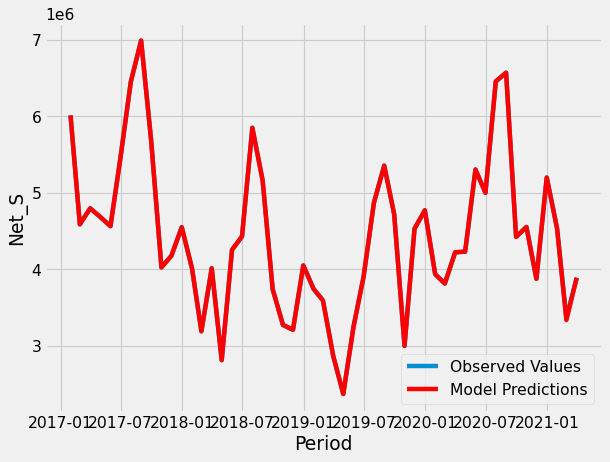

In [495]:
figure(figsize=(8, 6), dpi=80)
_ = plt.plot(y_test)
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net_S')
_ = plt.legend(['Observed Values','Model Predictions'] )
plt.show()

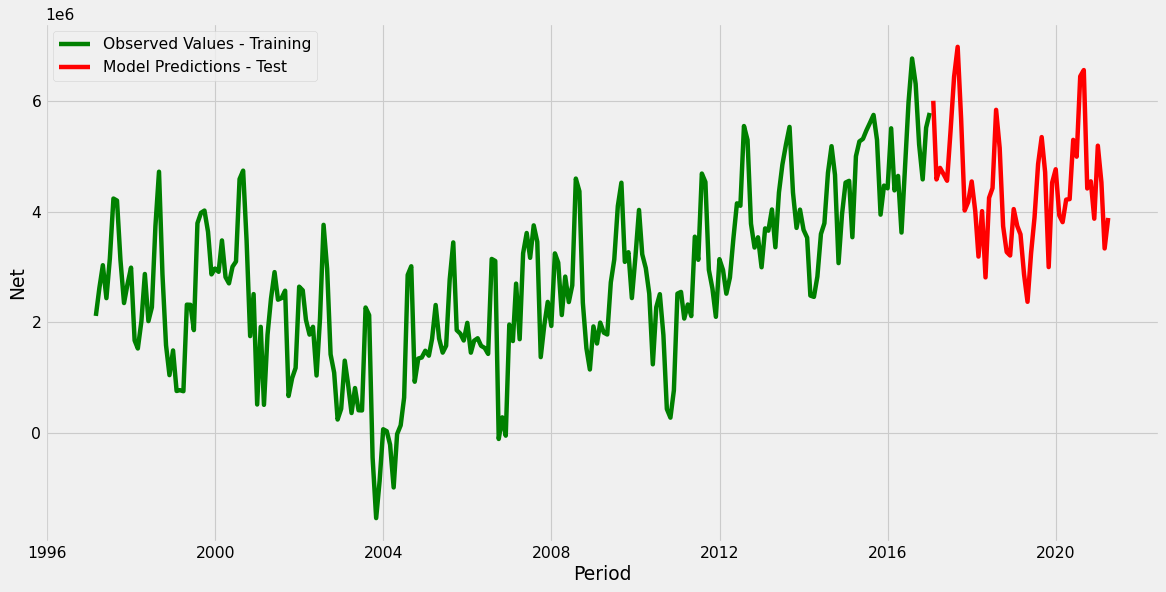

In [496]:
y_pred = rModel.predict(X_train)
figure(figsize=(16, 8), dpi=80)
_ = plt.plot(y_train, color = 'green')
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values - Training','Model Predictions - Test' ] )
plt.show()

In [497]:
west_net['constant'] = 1

west_net_tr = west_net['1997-02-28' : '2017-01-01']
X_train = west_net_tr[['Net_W', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
west_net_t = west_net['2017-01-01' : '2021-03-31']
X_test = west_net_t[['Net_W', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
y_test = canada_net_t['Net']
rModel = sm.OLS(y_train, X_train)
rModel = rModel.fit()
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     46.13
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           8.83e-11
Time:                        12:07:41   Log-Likelihood:                -3718.8
No. Observations:                 239   AIC:                             7442.
Df Residuals:                     237   BIC:                             7449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Net_W         -1.0989      0.162     -6.792      0.000      -1.418      -0.780
constant    2.662e+06   9.02e+04     29.521      0.000    2.48e+06    2.84e+06
==============================================================================
Omnibus:                        3.573   Durbin-Watson:                   0.249
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                3.616
Skew:                          -0.295   Prob(JB):                        0.164
Kurtosis:                       2.873   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

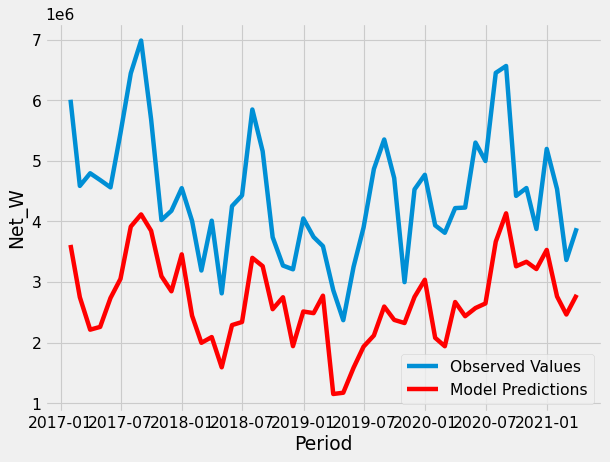

In [498]:
y_predict = rModel.predict(X_test)
figure(figsize=(8, 6), dpi=80)
_ = plt.plot(y_test)
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net_W')
_ = plt.legend(['Observed Values','Model Predictions'] )
plt.show()

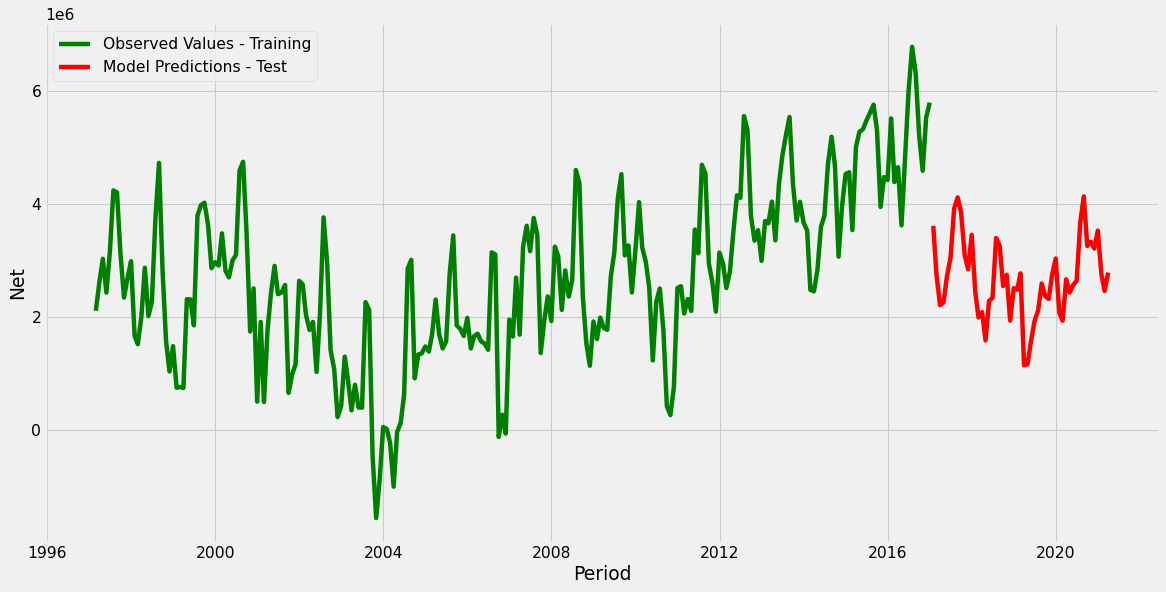

In [499]:
y_pred = rModel.predict(X_train)
figure(figsize=(16, 8), dpi=80)
_ = plt.plot(y_train, color = 'green')
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values - Training','Model Predictions - Test' ] )
plt.show()

In [500]:
east_net['constant'] = 1

east_net_tr = east_net['1997-02-28' : '2017-01-01']
X_train = east_net_tr[['Net_E', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
east_net_t = east_net['2017-01-01' : '2021-03-31']
X_test = east_net_t[['Net_E', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
rModel = sm.OLS(y_train, X_train)
rModel = rModel.fit()
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     621.0
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           3.75e-68
Time:                        12:07:42   Log-Likelihood:                -3586.3
No. Observations:                 239   AIC:                             7177.
Df Residuals:                     237   BIC:                             7184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Net_E         -1.4988      0.060    -24.919      0.000      -1.617      -1.380
constant   -1.056e+05   1.24e+05     -0.851      0.396    -3.5e+05    1.39e+05
==============================================================================
Omnibus:                        4.379   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.875
Skew:                           0.234   Prob(JB):                        0.144
Kurtosis:                       2.587   Cond. No.                     4.95e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

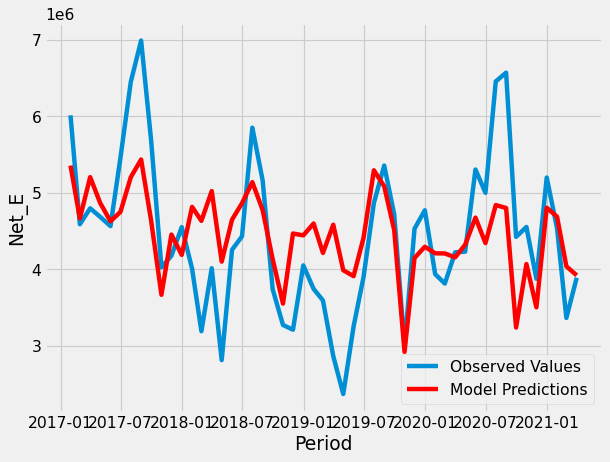

In [501]:
y_predict = rModel.predict(X_test)
figure(figsize=(8, 6), dpi=80)
_ = plt.plot(y_test)
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net_E')
_ = plt.legend(['Observed Values','Model Predictions'] )
plt.show()

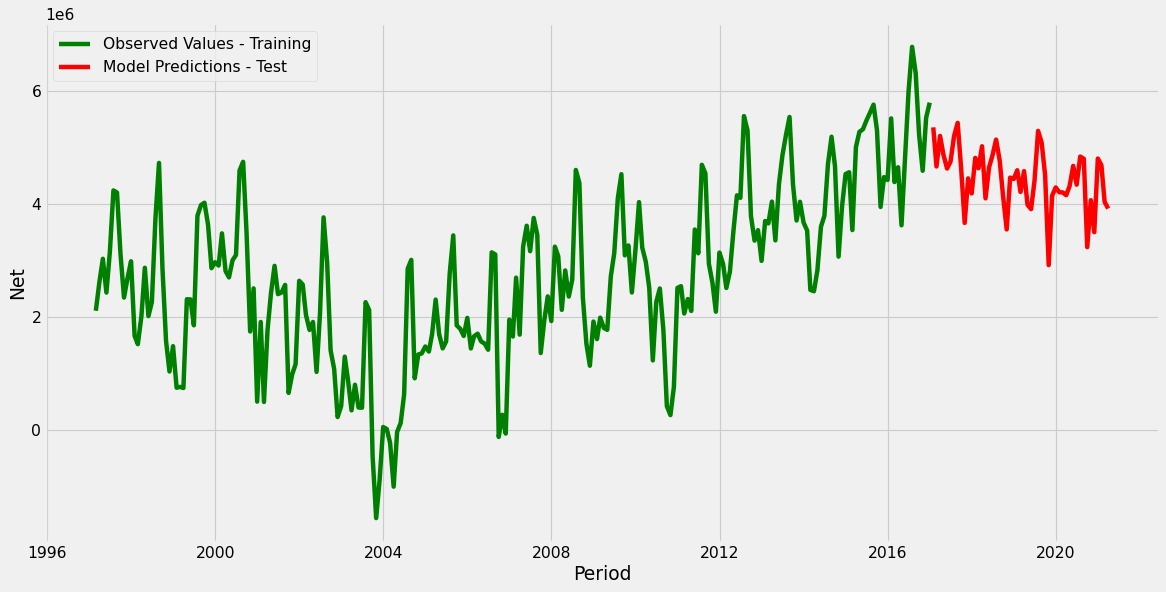

In [502]:
y_pred = rModel.predict(X_train)
figure(figsize=(16, 8), dpi=80)
_ = plt.plot(y_train, color = 'green')
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values - Training','Model Predictions - Test' ] )
plt.show()

In [503]:
south_net['constant'] = 1

south_net_tr = south_net['1997-02-28' : '2017-01-01']
X_train = south_net_tr[['Net_S', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
south_net_t = south_net['2017-01-01' : '2021-03-31']
X_test = south_net_t[['Net_S', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
rModel = sm.OLS(y_train, X_train)
rModel = rModel.fit()
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01386
Date:                Thu, 13 Jan 2022   Prob (F-statistic):              0.906
Time:                        12:07:43   Log-Likelihood:                -3740.1
No. Observations:                 239   AIC:                             7484.
Df Residuals:                     237   BIC:                             7491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Net_S         -0.5035      4.277     -0.118      0.906      -8.928       7.921
constant    2.701e+06   1.04e+05     26.014      0.000     2.5e+06    2.91e+06
==============================================================================
Omnibus:                        0.453   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.591
Skew:                           0.053   Prob(JB):                        0.744
Kurtosis:                       2.780   Cond. No.                     2.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

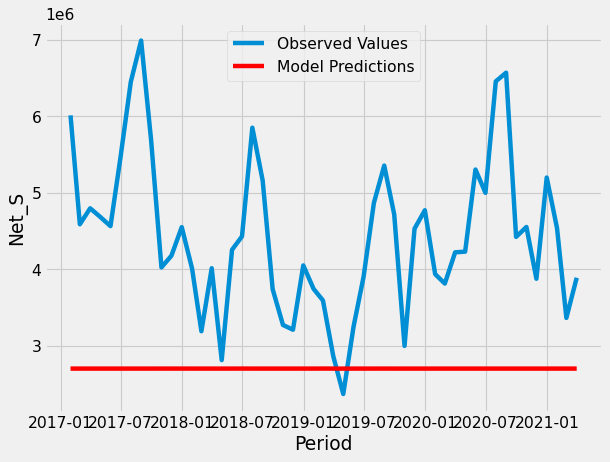

In [504]:
y_predict = rModel.predict(X_test)
figure(figsize=(8, 6), dpi=80)
_ = plt.plot(y_test)
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net_S')
_ = plt.legend(['Observed Values','Model Predictions'] )
plt.show()

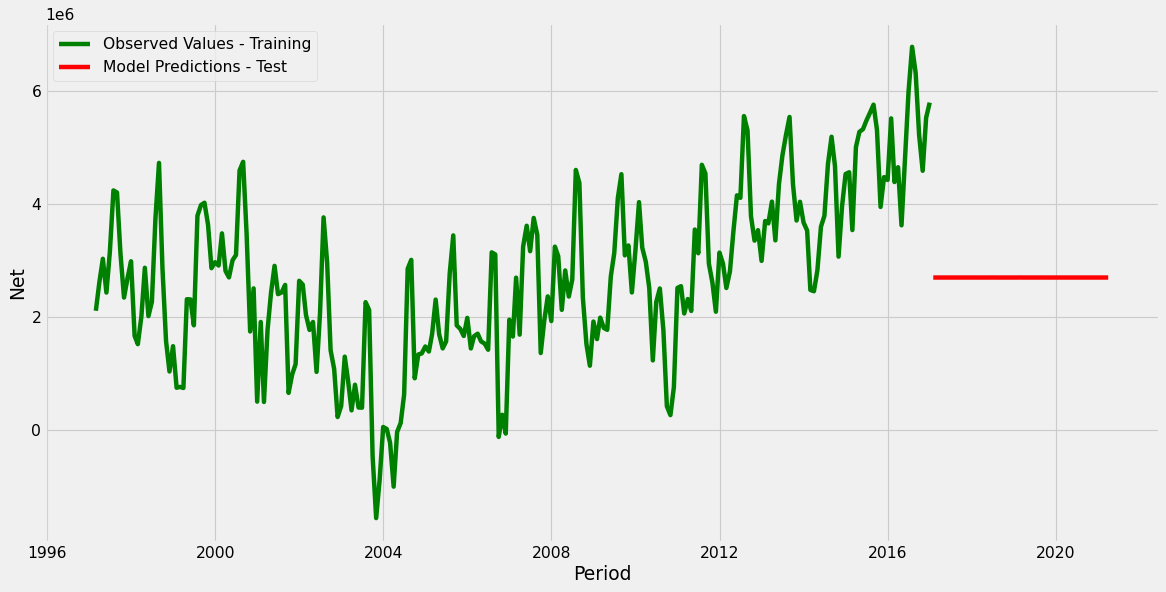

In [505]:
y_pred = rModel.predict(X_train)
figure(figsize=(16, 8), dpi=80)
_ = plt.plot(y_train, color = 'green')
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values - Training','Model Predictions - Test' ] )
plt.show()

In [506]:
middle_net['constant'] = 1

middle_net_tr = middle_net['1997-02-28' : '2017-01-01']
X_train = middle_net_tr[['Net_M', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
middle_net_t = middle_net['2017-01-01' : '2021-03-31']
X_test = middle_net_t[['Net_M', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
rModel = sm.OLS(y_train, X_train)
rModel = rModel.fit()
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     505.4
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           1.08e-60
Time:                        12:07:44   Log-Likelihood:                -3603.6
No. Observations:                 239   AIC:                             7211.
Df Residuals:                     237   BIC:                             7218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Net_M         -1.8475      0.082    -22.482      0.000      -2.009      -1.686
constant    1.262e+06   8.49e+04     14.864      0.000    1.09e+06    1.43e+06
==============================================================================
Omnibus:                        3.090   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                3.151
Skew:                          -0.255   Prob(JB):                        0.207
Kurtosis:                       2.765   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

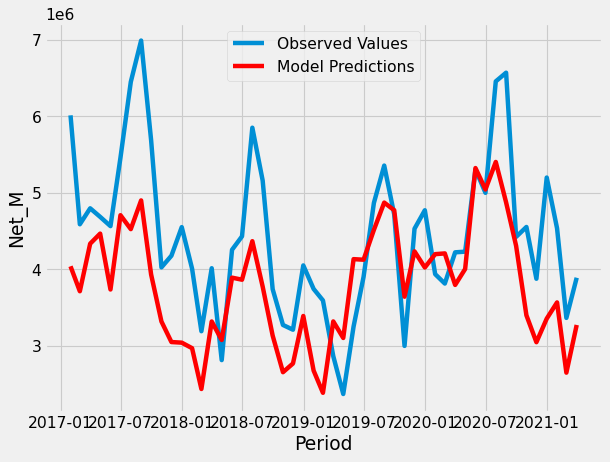

In [507]:
y_predict = rModel.predict(X_test)
figure(figsize=(8, 6), dpi=80)
_ = plt.plot(y_test)
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net_M')
_ = plt.legend(['Observed Values','Model Predictions'] )
plt.show()

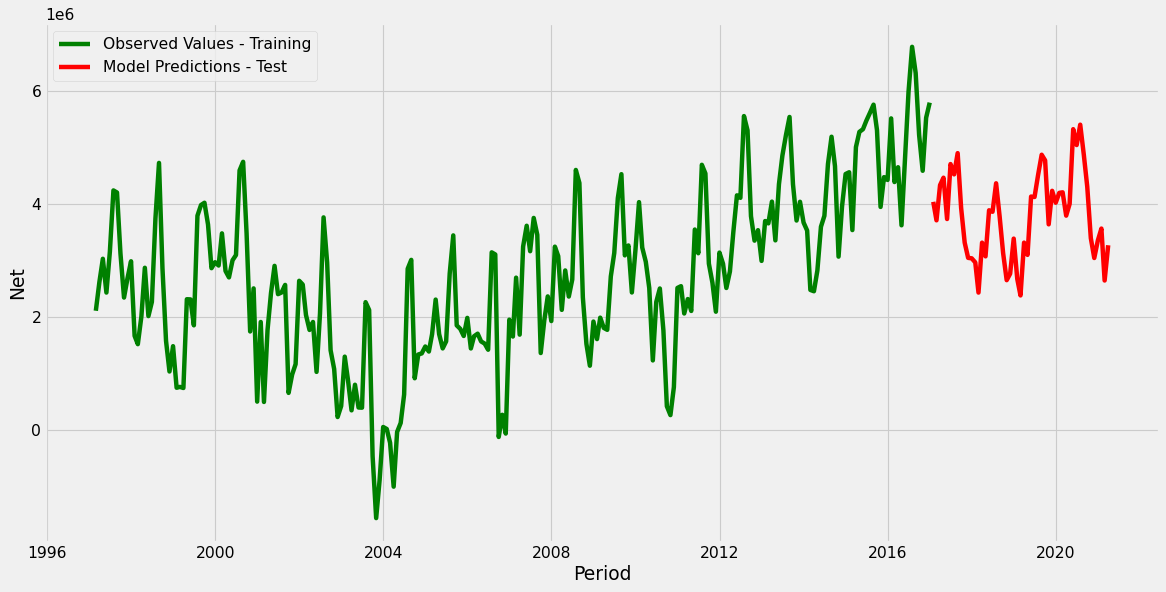

In [508]:
y_pred = rModel.predict(X_train)
figure(figsize=(16, 8), dpi=80)
_ = plt.plot(y_train, color = 'green')
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values - Training','Model Predictions - Test' ] )
plt.show()

# Lasso regression


In [509]:
usa_net['constant'] = 1
usa_net_tr = usa_net['1997-02-28' : '2017-01-01']
X_train = usa_net_tr
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
usa_net_t = usa_net['2017-01-01' : '2021-03-31']
X_test = usa_net_t
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)
lasso.score(X_test, y_test), lasso.score(X_train, y_train)


(0.9999848021483109, 0.9999986220032219)

In [510]:
west_net['constant'] = 1

west_net_tr = west_net['1997-02-28' : '2017-01-01']
X_train = west_net_tr[['Net_W', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
west_net_t = west_net['2017-01-01' : '2021-03-31']
X_test = west_net_t[['Net_W', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
y_test = canada_net_t['Net']
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)
lasso.score(X_test, y_test), lasso.score(X_train, y_train)


(-2.362627687431702, 0.16293980370977246)

In [511]:
east_net['constant'] = 1

east_net_tr = east_net['1997-02-28' : '2017-01-01']
X_train = east_net_tr[['Net_E', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
east_net_t = east_net['2017-01-01' : '2021-03-31']
X_test = east_net_t[['Net_E', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.3860808820630639, 0.723770131420471)

In [512]:
south_net['constant'] = 1

south_net_tr = south_net['1997-02-28' : '2017-01-01']
X_train = south_net_tr[['Net_S', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
south_net_t = south_net['2017-01-01' : '2021-03-31']
X_test = south_net_t[['Net_S', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(-2.9290194149378235, 5.8486403395119346e-05)

In [513]:
middle_net['constant'] = 1

middle_net_tr = middle_net['1997-02-28' : '2017-01-01']
X_train = middle_net_tr[['Net_M', 'constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
middle_net_t = middle_net['2017-01-01' : '2021-03-31']
X_test = middle_net_t[['Net_M', 'constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.10719868110693354, 0.680772781036679)